In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [61]:
coffee_df = pd.read_csv('/content/Transactions.csv')
coffee_df.head(10)


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,1/1/23,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,1,Jan,7,Sun,7
1,2,1/1/23,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
2,3,1/1/23,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,1,Jan,7,Sun,7
3,4,1/1/23,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
4,5,1/1/23,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,1,Jan,7,Sun,7
5,6,1/1/23,7:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,3.00,1,Jan,7,Sun,7
6,7,1/1/23,7:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,1,Jan,7,Sun,7
7,8,1/1/23,7:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,1,Jan,7,Sun,7
8,9,1/1/23,7:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,1,Jan,7,Sun,7
9,10,1/1/23,7:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,7.00,1,Jan,7,Sun,7


In [81]:
coffee_df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
std,43153.600016,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662
min,1.000000,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000


Text(0, 0.5, 'Frequency')

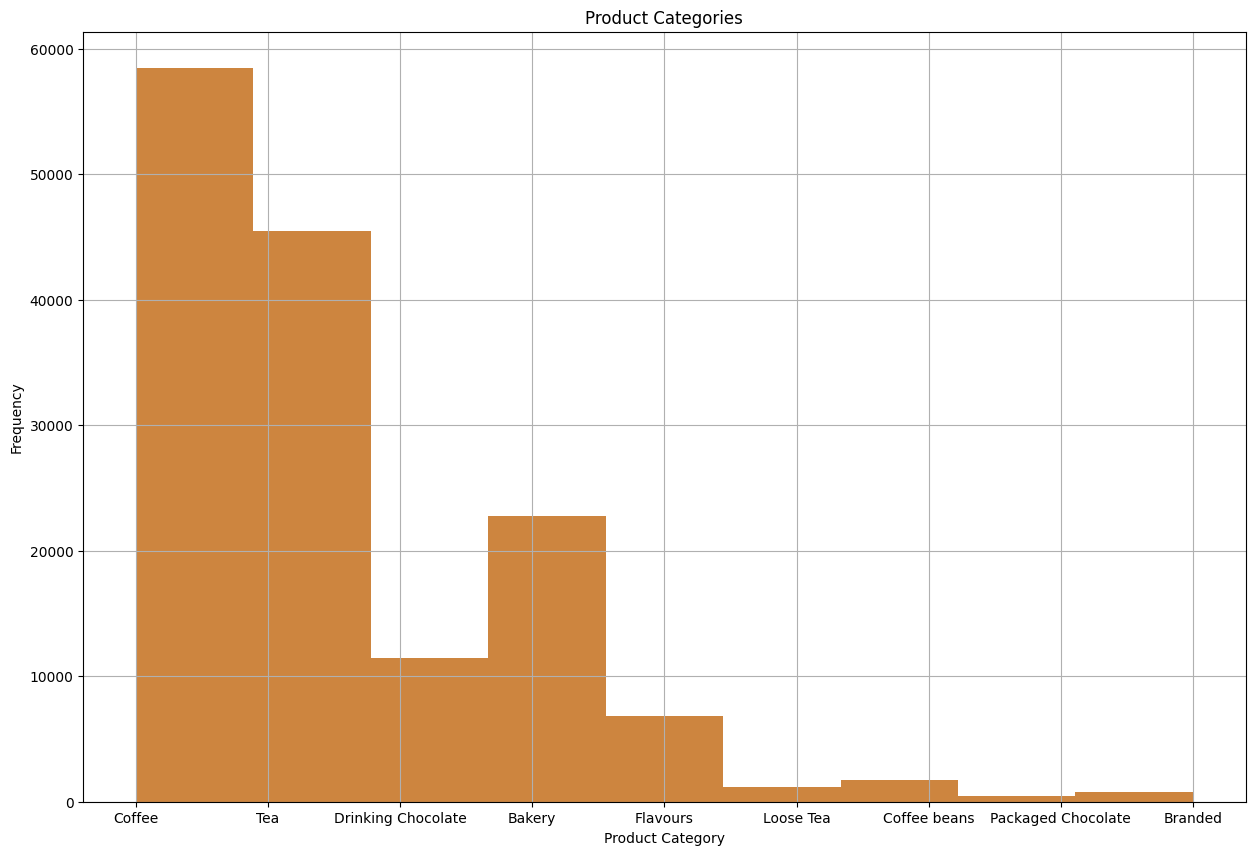

In [74]:
#histogram of product type
category_df = coffee_df['product_category']
c_hist = category_df.hist(figsize=(15,10), bins=9, color='peru')
c_hist.set_title('Product Categories')
c_hist.set_xlabel('Product Category')
c_hist.set_ylabel('Frequency')

In [ ]:
category_df.describe()

count     149116
unique         9
top       Coffee
freq       58416
Name: product_category, dtype: object

Text(0, 0.5, 'Revenue')

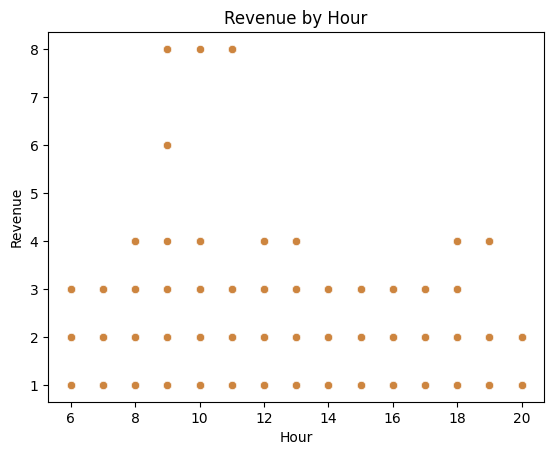

In [77]:
# scatter plot of revenue and day of the week
th = sns.scatterplot(x='Hour', y='transaction_qty', data=coffee_df, color='peru')
th.set_title('Revenue by Hour')
th.set_xlabel('Hour')
th.set_ylabel('Revenue')

Text(0, 0.5, 'Revenue')

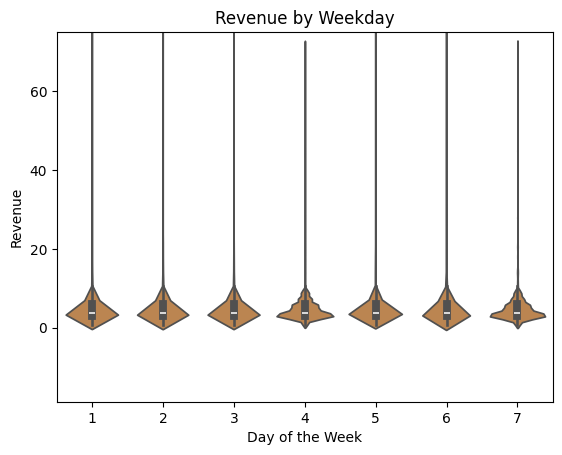

In [80]:
# scatter plot of revenue and hour of the day
#plt.figure(figsize=(15,10))
wr = sns.violinplot(x='Weekday', y='Revenue', data=coffee_df, color='peru')
wr.set_ylim(ymax=75)
wr.set_title('Revenue by Weekday')
wr.set_xlabel('Day of the Week')
wr.set_ylabel('Revenue')